In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pickle

In [38]:
similar_words = {'said',
'people',
'new',
'just',
'like',
'time',
'dont',
'years',
'year',
'know',
'make',
'told',
'way',
'work',
'did',
'according',
'think',
'world',
'say',
'want',
'day',
'trump',
'im',
'thats',
'president'}
df = pd.read_csv("../data/preprocessed/corpus.csv")


In [39]:
df

,category,title,body
0,ARTS & CULTURE,modeling agencies enabled sexual predators for...,in october carolyn kramer received disturbing ...
1,ARTS & CULTURE,actor jeff hiller talks bright colors and bold...,this week talked with actor jeff hiller about ...
2,ARTS & CULTURE,new yorker cover puts trump in the hole after ...,the new yorker is taking on president donald t...
3,ARTS & CULTURE,man surprises girlfriend by drawing them in di...,kellen hickey yearold who lives in hudson wisc...
4,ARTS & CULTURE,this artist gives renaissancestyle sculptures ...,theres something about combining the tradition...
...,...,...,...
6872,WOMEN,casually fearless why millennials are natural ...,still think about that tuesday night dinner w...
6873,WOMEN,happy birthday to us,remember the morning of my high school gradua...
6874,WOMEN,the culture of love,my husband gene doesnt wear pajamas asked him ...
6875,WOMEN,carpe diem oprah style,by antonioguillem via thinkstockby lisa odonog...


In [40]:
labels = df.category.unique()

In [41]:
X_train_nv, X_test_nv, y_train, y_test = train_test_split(df['body'],df['category'], test_size=0.2, random_state=42)

In [42]:
X_train_nv.shape, y_train.shape

((5501,), (5501,))

In [43]:
X_test_nv.shape, y_test.shape

((1376,), (1376,))

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text 

In [45]:
stop_words = text.ENGLISH_STOP_WORDS.union(similar_words)


In [46]:
tfv = TfidfVectorizer(stop_words=stop_words,max_features=5000)
X_train = tfv.fit_transform(X_train_nv.astype("U"))
X_test = tfv.transform(X_test_nv.astype("U"))

In [47]:
pickle.dump(tfv, open("../pickle_files/transformer.pkl", "wb"))

In [48]:
selected_array = tfv.get_feature_names()

In [49]:
from sklearn.feature_selection import SelectKBest, chi2
chi2_selector = SelectKBest(chi2, k=2000)
X_train = chi2_selector.fit_transform(X_train, y_train)
X_test = chi2_selector.transform(X_test)

In [50]:
pickle.dump(chi2_selector, open("../pickle_files/chi2_selector.pkl", "wb"))


In [51]:
cols = chi2_selector.get_support(indices=True)
# len(cols)

In [52]:
selected_features = [selected_array[i] for i in cols]
selected_features

['abc',
 'abortion',
 'abortions',
 'abstract',
 'abuse',
 'abused',
 'academic',
 'academy',
 'access',
 'account',
 'accountability',
 'accountable',
 'accounts',
 'accusations',
 'accused',
 'accusers',
 'achievement',
 'aclu',
 'acorn',
 'act',
 'actions',
 'activism',
 'activist',
 'activity',
 'actor',
 'actors',
 'actress',
 'actresses',
 'acts',
 'ad',
 'adams',
 'adaptation',
 'adapted',
 'administration',
 'administrations',
 'administrators',
 'admissions',
 'adorable',
 'ads',
 'adults',
 'advertisers',
 'advertising',
 'adviser',
 'advocates',
 'aesthetic',
 'affair',
 'afford',
 'african',
 'age',
 'agency',
 'agenda',
 'agreement',
 'ai',
 'aid',
 'aide',
 'ailes',
 'aired',
 'airline',
 'airlines',
 'alabama',
 'alaska',
 'album',
 'alcohol',
 'ali',
 'alice',
 'allegations',
 'alleged',
 'allegedly',
 'allies',
 'allows',
 'amazon',
 'amazons',
 'amendment',
 'america',
 'american',
 'americans',
 'analyst',
 'analysts',
 'analytica',
 'anchor',
 'ancient',
 'anderson'

In [53]:
from wordcloud import WordCloud
from collections import Counter


def generate_word_cloud(words, title):
    wc = WordCloud(
        background_color='white',
        width=600,
        height=500,
        colormap="Dark2",
        random_state=42
    )
    figure = plt.figure(figsize=(10, 8))
    word_could_dict = Counter(words)
    cloud = wc.generate(" ".join(words))
    plt.imshow(cloud, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.show()


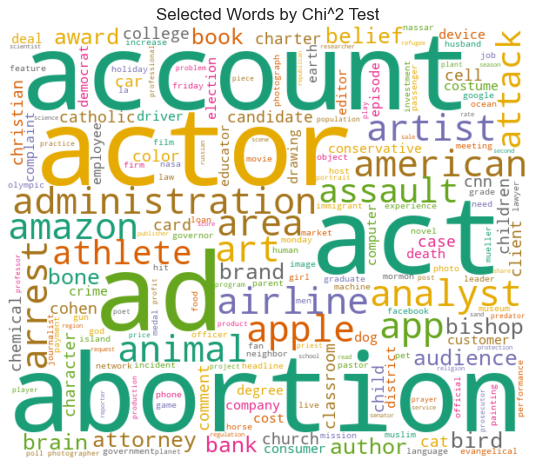

In [54]:
generate_word_cloud(selected_features, "Selected Words by Chi^2 Test")
# generate_word_cloud(similar_words, "Similar Words Found")


In [55]:
from sklearn.svm import SVC

In [56]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [57]:
svc.score(X_train, y_train)

0.9670968914742774

In [58]:
svc.score(X_test, y_test)

0.8030523255813954

In [59]:
from sklearn.metrics import confusion_matrix, classification_report

In [60]:
y_pred = svc.predict(X_test)

In [61]:
def draw_confusion_matrix(y_test, y_pred, labels):
    conf_mat = confusion_matrix(y_test, y_pred)
    sns.set(font_scale=1.4)
    df_cm = pd.DataFrame(conf_mat, index = labels,columns =labels)
    plt.figure(figsize=(10,8))
    sns.heatmap(df_cm, annot=True, cmap=plt.get_cmap('OrRd'), fmt='g')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


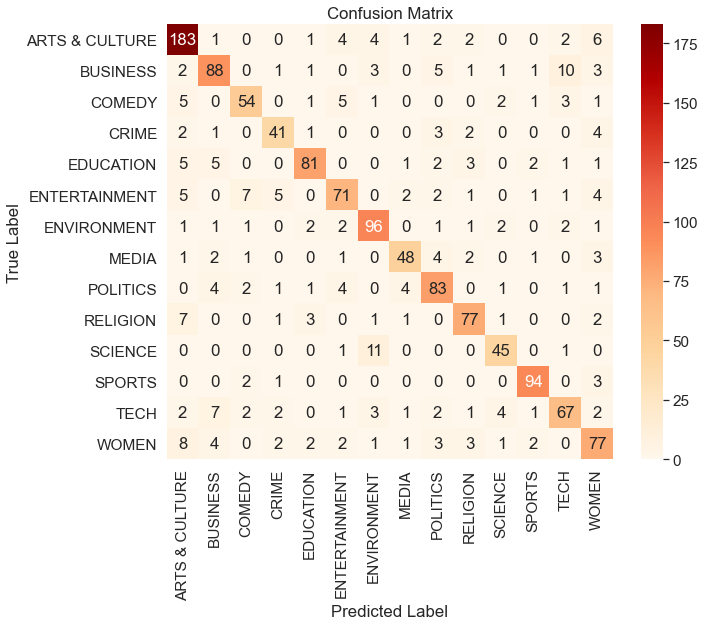

In [62]:
draw_confusion_matrix(y_test, y_pred, labels)

In [63]:
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

ARTS & CULTURE       0.83      0.89      0.86       206
      BUSINESS       0.78      0.76      0.77       116
        COMEDY       0.78      0.74      0.76        73
         CRIME       0.76      0.76      0.76        54
     EDUCATION       0.87      0.80      0.84       101
 ENTERTAINMENT       0.78      0.72      0.75        99
   ENVIRONMENT       0.80      0.87      0.83       110
         MEDIA       0.81      0.76      0.79        63
      POLITICS       0.78      0.81      0.79       102
      RELIGION       0.83      0.83      0.83        93
       SCIENCE       0.79      0.78      0.78        58
        SPORTS       0.91      0.94      0.93       100
          TECH       0.76      0.71      0.73        95
         WOMEN       0.71      0.73      0.72       106

      accuracy                           0.80      1376
     macro avg       0.80      0.79      0.80      1376
  weighted avg       0.80      0.80      0.80 

In [64]:
def draw_precision_recall_chart(y_test, y_pred, labels):
    clf_report = classification_report(
        y_test,
        y_pred,
        labels=labels,
        target_names=labels,
        output_dict=True
        )
    clf_report_df = pd.DataFrame(clf_report)
    clf_report_df.drop("support", axis=0, inplace=True)
    clf_report_df.drop(['macro avg', "weighted avg"], axis=1, inplace=True)
    sns.set(font_scale=1.4)
    plt.figure(figsize=(10, 8))
    sns.heatmap(clf_report_df.T, annot=True, cmap=plt.get_cmap('OrRd'), fmt='.3g')
    plt.title("Classification Report")
    plt.show()


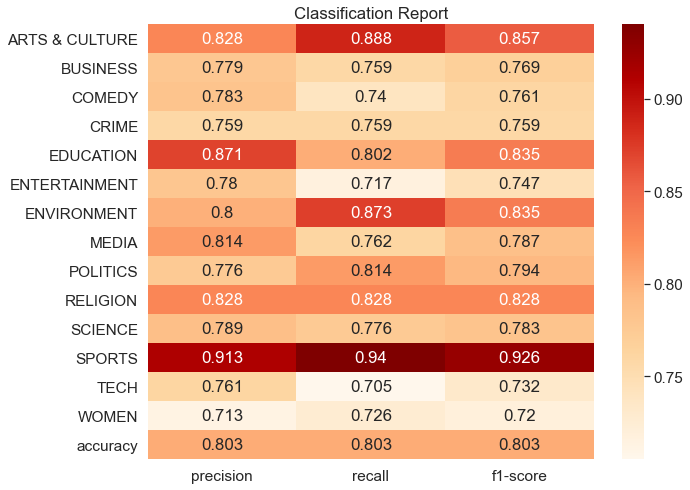

In [65]:
draw_precision_recall_chart(y_test, y_pred, labels)


In [66]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [67]:
def print_accuracies(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    print(f"Training Accuracy: {clf.score(X_train, y_train)}")
    print(f"Test Accuracy: {clf.score(X_test, y_test)}")

In [68]:
lg = LogisticRegression()
sgd = SGDClassifier()
nv = MultinomialNB()
rf = RandomForestClassifier(n_estimators=200, random_state=42)

In [69]:
print("===Logistic Regression===")
print_accuracies(lg, X_train, X_test, y_train, y_test)
print("===Stochastic Gradient Descent===")
print_accuracies(sgd, X_train, X_test, y_train, y_test)
print("===Naive Bayes===")
print_accuracies(nv, X_train, X_test, y_train, y_test)
print("===Random Forest Classifier===")
print_accuracies(rf, X_train, X_test, y_train, y_test)


===Logistic Regression===
Training Accuracy: 0.8556626067987638
Test Accuracy: 0.7957848837209303
===Stochastic Gradient Descent===
Training Accuracy: 0.9320123613888384
Test Accuracy: 0.7972383720930233
===Naive Bayes===
Training Accuracy: 0.8000363570259953
Test Accuracy: 0.7645348837209303
===Random Forest Classifier===
Training Accuracy: 0.9994546446100709
Test Accuracy: 0.748546511627907


# Neural Networks

In [70]:
pickle.dump(lg, open("../pickle_files/model.pkl", "wb"))


In [71]:
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequencess

# max_words = 4000
# max_len = 500

In [72]:
# tokenizer = Tokenizer(num_words=max_words)
# 
# tokenizer.fit_on_texts(X_train_nv.astype("U"))# 
# sequences = tokenizer.texts_to_sequences(X_train_nv.astype("U"))# 

# X_train = pad_sequences(sequences=sequences, maxlen=max_len, padding='post', truncating='post# ')

# test_sequences = tokenizer.texts_to_sequences(X_test_nv.astype(# "U"))
# X_test = pad_sequences(test_sequences, maxlen=ma# x_len,
#                        padding='post', truncating='post')


In [73]:
# import tensorflow as tf
# 
# from tensorflow.keras import layers, models

In [74]:
# from sklearn.preprocessing import LabelEncoder
# 
# le = LabelEncoder(# )
# y_train = le.fit_transform(y_trai# n)
# y_test = le.transform(y_test)

In [75]:
# label_map = le.classes_

In [76]:
# model = models.Sequential()
# model.add(layers.Embedding(tokenizer.num_words, 128))
# model.add(layers.LSTM(128, return_sequences=True))
# model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.4))
# model.add(layers.LSTM(128))
# model.add(layers.BatchNormalization())
# model.add(layers.Dense(256))
# model.add(layers.BatchNormalization())
# model.add(layers.Dense(128))
# model.add(layers.Dense(64))
# model.add(layers.Dense(len(labels), activation='sigmoid'))


In [77]:
# model.summary()

In [78]:
# model.compile(
#     optimizer=tf.keras.optimizers.Adam(),
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#     metrics=['accuracy']
# )

In [79]:
# history = model.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1, validation_data=(X_test, y_test))

# FINETUNING

In [80]:
# from sklearn.model_selection import GridSearchCV

In [81]:
# params = {
#     'C': [1, 2, 3]
# }
# clf = GridSearchCV(SVC(), params, n_jobs=-1, verbose=3)

In [82]:
# clf.fit(X_train, y_train)

In [83]:
# clf.score(X_train, y_train)

In [84]:
# clf.score(X_test, y_test)

In [85]:
# clf.best_params_

In [86]:
# params = {
#     'loss': ['hinge', 'log'],
#     'penalty': ['l1','l2','elasticnet'],
#     'alpha' : [0.0001, 0.001, 0.01, 0.1, 1],
#     'l1_ratio' : [0.01, 0.1, 0.15, 0.20, 0.30, 1]
# }
# clf = GridSearchCV(SGDClassifier(verbose=1, n_jobs=-1), params, n_jobs=-1, verbose=1)

In [87]:
# clf.fit(X_train, y_train)


In [88]:
accuracies = {
    "LR": [85.56, 79.57],
    "SGD" : [93.02, 79.51],
    "NB" : [80.00, 76.45],
    "SVM": [96.71, 80.31],
    "RF" : [99.99, 74.85],
    "NN" : [96, 49]
}

accuracy_plot = {
    "Algorithms": [algo for algo in accuracies.keys()] * 2,
    "Scores" : [s[0] for s in accuracies.values()] + [s[1] for s in accuracies.values()],
    "group": ["Training Accuracy" for _ in range(len(accuracies.keys()))] + ["test Accuracy" for _ in range(len(accuracies.keys()))]
}


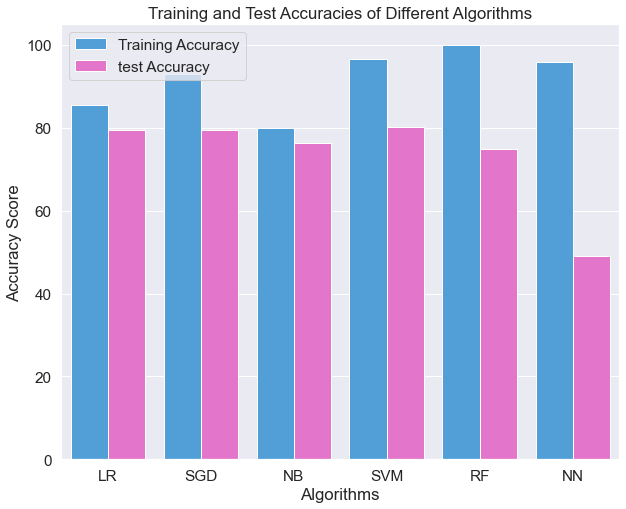

In [89]:
fig = plt.figure(figsize=(10, 8))
bplot = sns.barplot(x="Algorithms", y="Scores", hue="group",
                    data=accuracy_plot, palette=['#3ba3ec', '#f564d4'])
bplot.set_title("Training and Test Accuracies of Different Algorithms")
bplot.set_xlabel("Algorithms")
bplot.set_ylabel("Accuracy Score")
plt.show()

In [90]:
from sklearn.model_selection import GridSearchCV
params = {
    'penalty': ['l1','l2','elasticnet'],
    'C' : [0.1, 1,10,100],
    'solver': ["newton-cg", "lbfgs", "sag", "saga"]
}
clf = GridSearchCV(LogisticRegression(), params, n_jobs=-1, verbose=3)


In [91]:
# clf.fit(X_train, y_train)

In [92]:
# clf.best_score_

In [93]:
# clf.best_params_

In [94]:
# clf.best_estimator_

In [95]:
# lgc = LogisticRegression(C=10, solver='saga')
# lgc.fit(X_train, y_train)

In [96]:
# lgc.score(X_train, y_train)

In [97]:
# lgc.score(X_test, y_test)

In [98]:
lg.fit(X_train, y_train)

LogisticRegression()

In [99]:
lg.score(X_train, y_train)

0.8556626067987638

In [100]:
lg.score(X_test, y_test)

0.7957848837209303

In [101]:
y_pred = lg.predict(X_test)

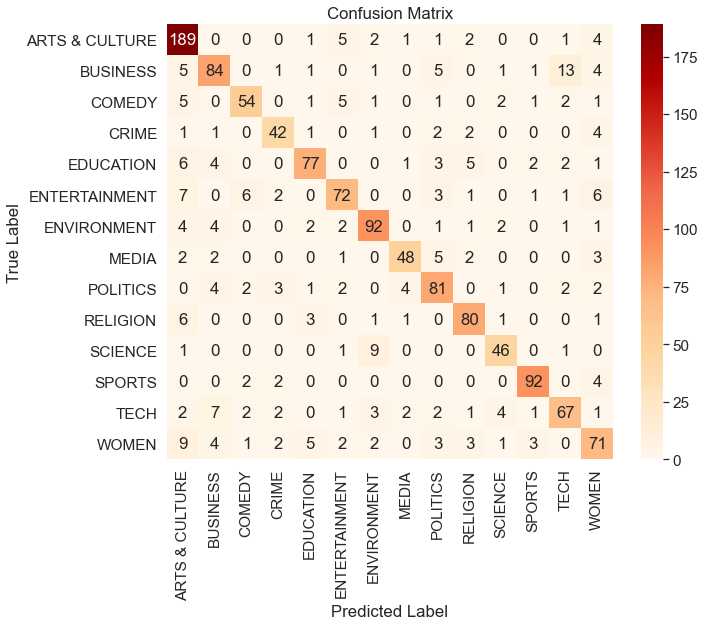

In [102]:
draw_confusion_matrix(y_test, y_pred, labels)

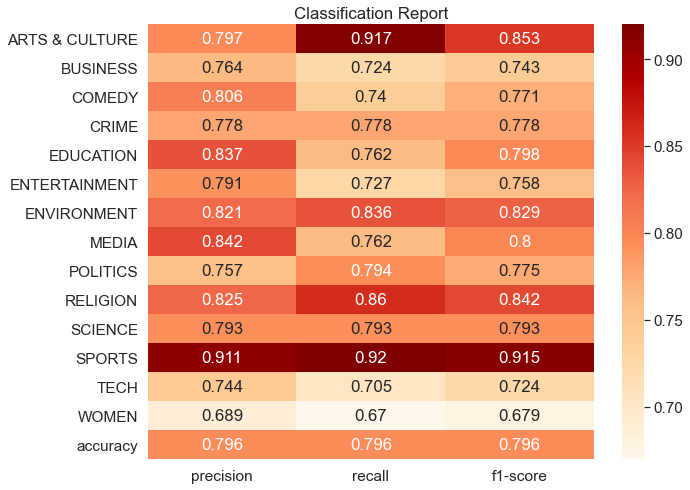

In [103]:
draw_precision_recall_chart(y_test, y_pred, labels)